In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from drift_qec import *

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


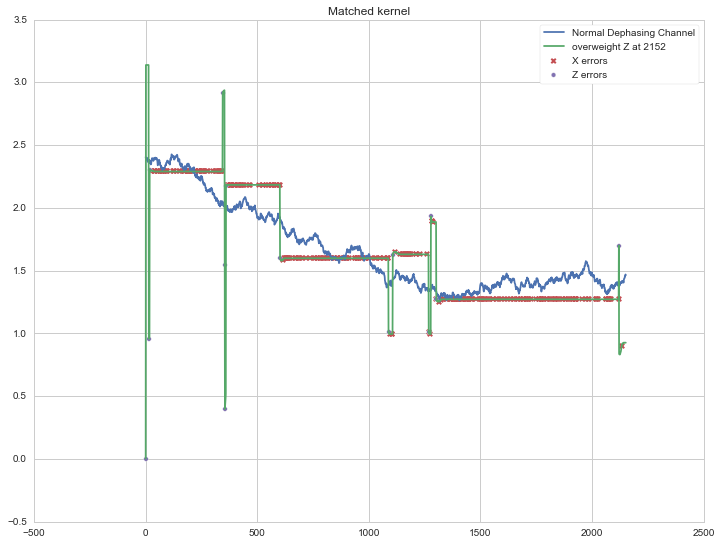

In [5]:
error_rate = 0.01
kappa = 100
drift_rate = 0.01
sigma = 0.01
max_time = 1 / (0.06 * error_rate) ** 2
channel = NormalDephasingChannel(error_rate=0.01, kappa=kappa, drift_rate=drift_rate, max_time=max_time, sigma=sigma)
est = NormalDephasingEstimator(grains=1000, kappa=kappa, widening_rate=drift_rate, sigma=sigma)
report = Report("Normal Dephasing Channel")

simulate(channel, est, report)

fig, ax = plt.subplots(figsize=(12, 9))
report.plot(ax)
ax.set_title("Matched kernel")
ax.legend(frameon=True)

In [ ]:
def periodic_convolve(x, k):
    """
    Returns a the convolution of periodic signal x with k.
    """
    t = np.r_[x[-len(k):], x, x[:len(k)+1]]
    yfwd = np.convolve(t, k, "valid")
    ybwd = np.convolve(t[::-1], k, "valid")[::-1]
    y = 0.5*(yfwd[1:]+ybwd[:-1])
    Mi = np.floor(len(k)/2.0).astype(np.int)
    Mf = np.ceil(len(k)/2.0).astype(np.int)
    return y[Mf:-Mf]

x = est.p
k = est.kernel
y = x
for _ in range(1):
    y = periodic_convolve(y, k)
plt.plot(x, label="est.p")
plt.plot(y, label="periodic_convole")
plt.legend(frameon=True, loc=2)